In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization,Dropout


In [2]:
# Set the path to the dataset folder
dataset_dir = r'C:\Users\ADMIN\project soft computing\generated_images'

# Set the image dimensions
img_width, img_height = 150, 150

# Set the number of classes
num_classes = 4

# Set the batch size
batch_size = 32

# Create an ImageDataGenerator for rescaling the pixel values
data_generator = ImageDataGenerator(rescale=1./255)



In [3]:
# Load the training dataset
train_generator = data_generator.flow_from_directory(
    os.path.join(dataset_dir, 'Training'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 640 images belonging to 4 classes.


In [4]:
# Load the testing dataset
test_generator = data_generator.flow_from_directory(
    os.path.join(dataset_dir, 'Testing'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 96 images belonging to 4 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=3)

Epoch 1/3
20/20 [==============================] - 27s 1s/step - loss: 27.0060 - accuracy: 0.8922
Epoch 2/3
20/20 [==============================] - 26s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/3
20/20 [==============================] - 28s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [7]:

# Evaluate the model on the testing dataset
accuracy = model.evaluate(test_generator)[1]
print("Accuracy:", accuracy)


3/3 [==============================] - 2s 303ms/step - loss: 0.3965 - accuracy: 0.8333
Accuracy: 0.8333333134651184


1/1 [==============================] - 0s 56ms/step


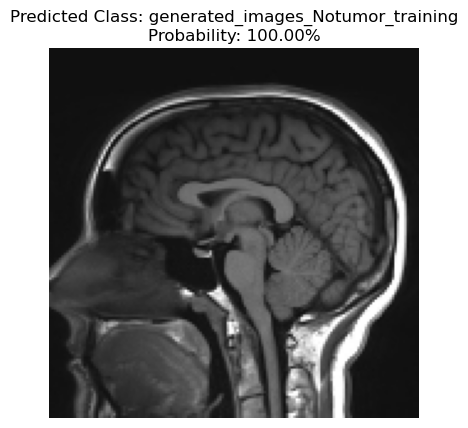

In [9]:
# Function to predict the class of a new MRI image
def predict_tumour(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_labels = train_generator.class_indices
    inverted_labels = {v: k for k, v in class_labels.items()}
    predicted_class = inverted_labels[np.argmax(predictions)]
    probability = np.max(predictions) * 100
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class}\nProbability: {probability:.2f}%")
    plt.axis('off')
    plt.show()

# Test the model on a new MRI image
new_image_path = r"C:\Users\ADMIN\project soft computing\Tr-no_0019.jpg"
predict_tumour(new_image_path)
